In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)

import fly_plot_lib.plot as fpl

FS=7
colormap='bone_r'

## Odor Statistics Panels

In [2]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyMASigned.h5")
def get_statistics(df,index,fdf):
    osm.avg_distance(df,index,fdf)
    osm.mean_conc(df,index,fdf)
    osm.motion_statistics(df,index,fdf)
    osm.whiff_blank_duration(df,index,fdf)
    osm.trajectory_speed(df,index,fdf)
    osm.encounter_frequency(df,index,fdf,1,2)
    osm.mean_avg(df,index,fdf)
    osm.mean_t(df,index,fdf)
    osm.std_whiff(df,index,fdf)
    
np.seterr(divide = 'ignore') 
index = osm.get_index(df)
fdf = pd.DataFrame()
get_statistics(df,index,fdf)

/home/gadfly/DataAnalysis/odor_analysis/data_exploration/figure/../odor_statistics_lib.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.efreq.iloc[start] = 1


In [3]:
df['whiff_duration_plot'] = 0  # Initialize the column with zeros
dt = df.time[1] - df.time[0]

for i in index:
    val = dt * len(i)
    df.loc[i, 'whiff_duration_plot'] = val
    

df['whiff_concentration_plot'] = 0  # Initialize the column with zeros
dt = df.time[1] - df.time[0]

for i in index:
    val = np.mean(df.odor[i])
    df.loc[i, 'whiff_concentration_plot'] = val


df['whiff_sd_plot'] = 0  # Initialize the column with zeros
for i in index:
    val = np.std(df.odor[i])
    df.loc[i, 'whiff_sd_plot'] = val

df['whiff_wf_plot'] = 0  # Initialize the column with zeros
for i in index:
    val = np.mean(df.encounter_frequency[i])
    df.loc[i, 'whiff_wf_plot'] = val

df['whiff_ma_plot'] = 0  # Initialize the column with zeros
for i in index:
    val = np.mean(df.ma_inter[i])
    df.loc[i, 'whiff_ma_plot'] = val

### Load Figure First Layout

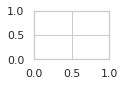

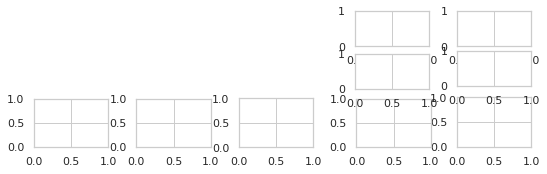

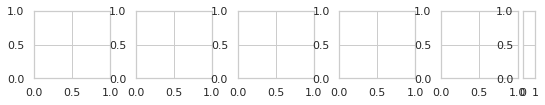

In [32]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig4.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

## Raw Signal

In [5]:
r = [4002.05,4003]

In [7]:
ax=layout.axes[('rawodorfig','rawodor')]
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
x = []
for i in range(len(index)):
    if math.isclose(df.time.loc[index[i][0]],r[0],abs_tol=1):
        x.append(i)
        
for i in range(1,len(x)):
    ax.axvspan(xmin=df.time.loc[index[x[i]][0]],xmax= df.time.loc[index[x[i]][-1]],ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
i=0
for i in range(1,len(x)-1):
    ax.axvspan(xmin=df.time.loc[(index[x[i]][-1])+1],
               xmax= df.time.loc[(index[x[i+1]][0])-1],ymin=0,ymax=0.42,  alpha=0.2, color='red')

ax.axvspan(xmin=df.time.loc[(index[x[-1]][-1])+1],
           xmax= df.time.loc[(index[x[-1]][-1])+100],ymin=0,ymax=0.42,  alpha=0.2, color='red')

### Whiff Duration
ax.set_xlim(r)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)
ax.axhline(4.5, linestyle='--', c='red', linewidth=1)
ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Odor, a.u.')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['rawodorfig'], 'rawodorfig', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Duration

In [33]:
ax=layout.axes[('fig2','ele11')]
ax.plot(df.time,df.whiff_duration_plot, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.set_ylim(0,0.2)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,0.2],
                            linewidth=0.5)
ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Whiff\nTime, s')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Concentration

In [34]:
ax=layout.axes[('fig2','ele13')]
ax.plot(df.time,df.whiff_concentration_plot, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([0,1])
ax.set_ylabel('Mean\nOdor, a.u.')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Std Dev

In [35]:
ax=layout.axes[('fig2','std01')]
ax.grid(False)
ax.plot(df.time,df.whiff_sd_plot, c='black', linewidth=0.6,rasterized= True)
ax.set_xlim(r)

ax.set_ylim(0,2)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,2],
                            linewidth=0.5)
ax.set_xticklabels([0,1])

ax.set_rasterization_zorder(-20)
ax.set_ylabel('a.u.')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Frequency

In [36]:
df1 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyStatsTime_std.h5")

In [37]:
ax=layout.axes[('fig2','ele15')]
ax.plot(df.time,df.efreq, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,1],
                            linewidth=0.5)

# ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [38]:
ax=layout.axes[('fig2','ele16')]
ax.plot(df.time,df.encounter_frequency, c='black', linewidth=0.6)
ax.set_xlim(r)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,4],
                            linewidth=0.5)

# ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('hz', rotation=90)
ax.yaxis.set_label_coords(-0.20, 0.3)
# ax.set_xlabel('Time,s')
# ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [39]:
ax=layout.axes[('fig2','e3')]
ax.plot(df.time,df.whiff_wf_plot, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.grid(False)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,3],
                            linewidth=0.5)

ax.set_xticklabels([0,1])
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('hz')
ax.yaxis.set_label_coords(-0.20, 0.25)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Moving Average

In [40]:
ax=layout.axes[('fig2','ele17')]
ax.plot(df.time,df.odor, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.axvspan(xmin=4002.5,xmax= 4003,  alpha=0.3, color='silver')
ax.axvspan(xmin=4002.6,xmax= 4003, alpha=0.5, color='grey')
ax.axvspan(xmin=4002.7,xmax= 4003, alpha=0.3, color='dimgrey')
# ax.axvspan(xmin=4002.8,xmax= 4003, alpha=0.2, color='green')

ax.grid(False)


ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)

# ax.set_xticklabels([0,1])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [41]:
ax=layout.axes[('fig2','ele18')]
ax.plot(df.time,df.ma_inter, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.grid(False)


ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,5],
                            linewidth=0.5)

# ax.set_xticklabels([0,1])

ax.set_ylabel('a.u.',rotation=90)
ax.yaxis.set_label_coords(-0.2, 0.23)
# ax.set_xlabel('Time,s')
# ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [42]:
ax=layout.axes[('fig2','f3')]
ax.plot(df.time,df.whiff_ma_plot, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.grid(False)
# ax.set_ylim(0,5)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,5],
                            linewidth=0.5)

ax.set_xticklabels([0,1])
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('a.u.')
ax.yaxis.set_label_coords(-0.20, 0.27)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

## Stat Figures

In [27]:
dir='~/DataAnalysis/data/Sprints/HighRes/'
fdf1 = pd.read_hdf(dir+"NotWindy/NotWindyStatsTime_std.h5")
fdf2 = pd.read_hdf(dir+"Windy/WindyStatsTime_std.h5")
# fdf3 = pd.read_hdf(dir+"Forest/ForestStatsTime_std.h5")

fdf = pd.concat([fdf1,fdf2])
fdf.reset_index(inplace=True, drop=True)

### Whiff Duration

In [28]:
ax=layout.axes[('figindiv','ax1')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.log_whiff, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wd, s')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_xlabel('Distance from\nSource, m')
ax.xaxis.set_label_coords(0.5, -0.1)

# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[-1,1.8],
                            yticks=[-2.5,1.5],
                            linewidth=0.5)

ax.set_yticklabels([r'$10^{-2.5}$',r'$10^{1.5}$'])

ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])
ax.tick_params(axis='y', which='major', pad=1)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Concentration


In [29]:
ax=layout.axes[('figindiv','ax2')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_concentration, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wc, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[4.5,10.5],
                            linewidth=0.5)

# ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Standard Deviation

In [30]:
ax=layout.axes[('figindiv','ax3')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.std_whiff, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
# ax.set_ylim()
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="std_whiff", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wsd, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)



mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,2.5],
                            linewidth=0.5)

ax.set_yticklabels(['0','2.5'])
# ax.tick_params(axis='y', which='major', pad=1)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Frequency

In [31]:
ax=layout.axes[('figindiv','ax4')]


var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_ef, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wf, Hz')
ax.yaxis.set_label_coords(-0.08, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,8],
                            linewidth=0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Moving Average

In [32]:
ax=layout.axes[('figindiv','ax5')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.whiff_ma, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
ax.set_ylim(0,)
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="whiff_ma", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wma, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)


mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,10.5],
                            linewidth=0.5)

# ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Colorbar

In [26]:
ax = layout.axes[('figindiv', 'cbar')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc, a.u.",rotation=90, labelpad=-22)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['figindiv'], 'figindiv', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')